In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# Wordclouds for decades

In [9]:
# Import lyrics data
platinum_lyrics_df = pd.read_csv("https://platinum-lyric-bucket.s3.us-east-2.amazonaws.com/platinum_lyrics.csv")
platinum_lyrics_df.head()

,Unnamed: 0,track_id,artist_name,song_title,song_year,target_success,target_weeks,target_peak,abov,accept,...,yeah,year,yellow,yes,yesterday,yet,york,young,yourself,youth
0,0,TRAAAAV128F421A322,western addiction,a poor recipe for civic cohesion,2005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,TRAAABD128F429CF47,the box tops,soul deep,1969,1,18,14,0,0,...,4,0,0,0,0,0,0,0,0,0
2,2,TRAAAGF12903CEC202,halvdan sivertsen,smã¥ ord,2005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,TRAAAZF12903CCCF6B,matthew wilder,break my stride,1984,1,29,95,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,TRAABEV12903CC53A4,suicide commando,blood in face,2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def wordcloud_decade(decade):
    # filter by the decade
    decade_df = platinum_lyrics_df.loc[(platinum_lyrics_df['song_year'] >= decade) & 
                                       (platinum_lyrics_df['song_year'] < decade + 10) &
                                       (platinum_lyrics_features_df['target_success'] == 1)]
    
    # drop non-word columns
    decade_df = decade_df.drop(['Unnamed: 0', 'track_id', 'artist_name', 'song_title', 'song_year', 'target_success', 'target_weeks', 'target_peak'], 1)

    # find the sum of the the colum for each word
    word_list = decade_df.sum().sort_values(ascending=False)

    # convert this list to a dataframe and select the top 30 words
    decade_df = pd.DataFrame({'word':word_list.index, 'count':word_list.values}).loc[30:45]

    # convert the df to a dict
    decade_dict = dict(zip(decade_df['word'].tolist(), decade_df['count'].tolist()))

    # https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe

    # define the word cloud
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(decade_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

1950-1960 wordcloud:


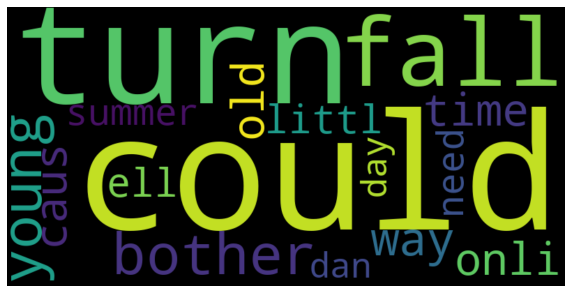

1960-1970 wordcloud:


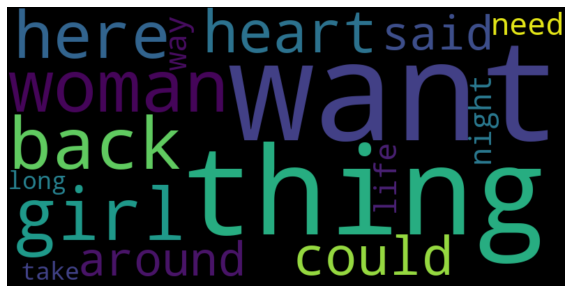

1970-1980 wordcloud:


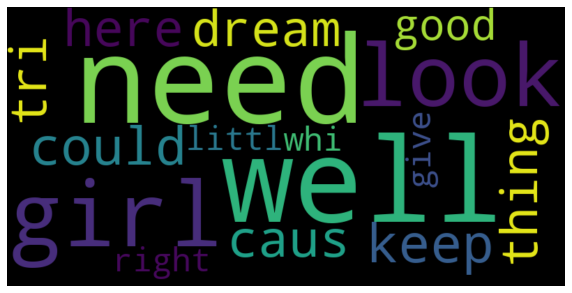

1980-1990 wordcloud:


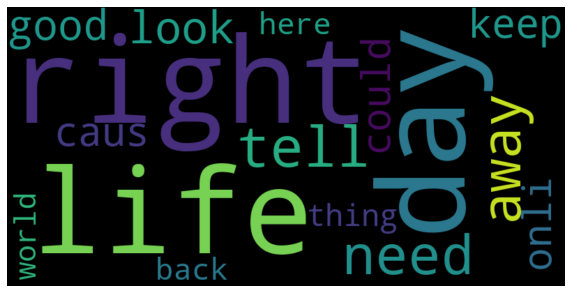

1990-2000 wordcloud:


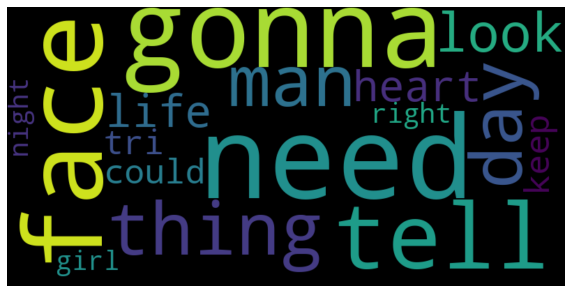

2000-2010 wordcloud:


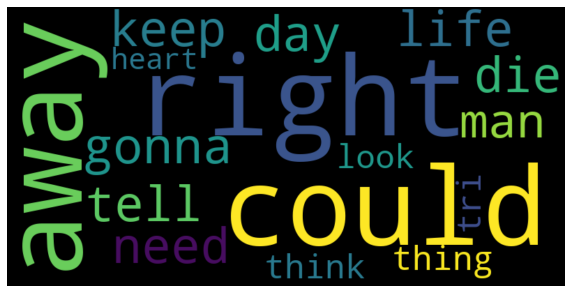

2010-2020 wordcloud:


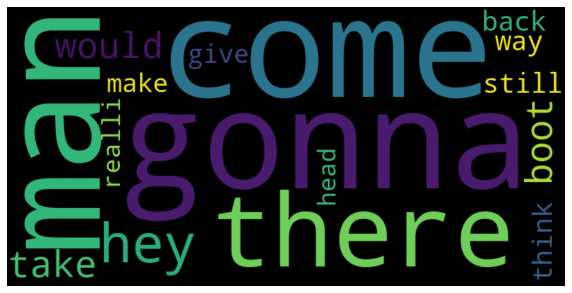

In [14]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

for year in years:
    print(str(f'{year}-{year + 10} wordcloud:'))
    wordcloud_decade(year)

# Wordclouds for genre

In [2]:
# Import features data
platinum_lyrics_features_df = pd.read_csv('https://platinum-lyric-bucket.s3.us-east-2.amazonaws.com/platinum_lyrics_features.csv')
platinum_lyrics_features_df.head()

,Unnamed: 0,track_id,artist_name,song_title,song_year,feature_genre,feature_popularity,feature_duration,feature_key,feature_acousticness,...,yeah,year,yellow,yes,yesterday,yet,york,young,yourself,youth
0,0,TRAAABD128F429CF47,the box tops,soul deep,1969,pop,38,147760,9,0.1950,...,4,0,0,0,0,0,0,0,0,0
1,1,TRAAAZF12903CCCF6B,matthew wilder,break my stride,1984,pop,78,184480,10,0.1950,...,0,0,0,0,0,0,0,0,0,0
2,2,TRAADKW128E079503A,tracy chapman,fast car,1988,folk,78,296800,4,0.3130,...,0,0,0,0,0,0,0,1,0,0
3,3,TRAAFEU128E078581C,r.e.m.,fall on me,1986,rock,48,169920,0,0.0711,...,0,0,0,0,0,0,0,0,0,0
4,4,TRAAGMC128F4292D0F,little texas,my love,1994,country,44,245800,9,0.3770,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def wordcloud_genre_success(genre):
    # filter by the genre
    df_genre = platinum_lyrics_features_df.loc[(platinum_lyrics_features_df['feature_genre'] == genre) & (platinum_lyrics_features_df['target_success'] == 1)]

    # drop non-word columns
    df_genre = df_genre.drop(['Unnamed: 0', 
                          'track_id', 
                          'artist_name', 
                          'song_title', 
                          'song_year', 
                          'target_success', 
                          'target_weeks', 
                          'target_peak',
                         'feature_genre',
                         'feature_popularity',
                         'feature_duration',
                         'feature_key',
                         'feature_acousticness',
                         'feature_instrumentalness',
                         'feature_tempo',
                         'feature_mode',
                         'feature_danceability',
                         'feature_energy',
                         'feature_energy',
                         'feature_loudness',
                         'feature_speechiness',
                         'feature_valence',
                         'feature_explicit'], 1)
    
    # find the sum of the the colum for each word
    word_list = df_genre.sum().sort_values(ascending=False)

    # convert this list to a dataframe and select the top 30 words
    df_genre = pd.DataFrame({'word':word_list.index, 'count':word_list.values}).loc[30:45]

    # convert the df to a dict
    genre_dict = dict(zip(df_genre['word'].tolist(), df_genre['count'].tolist()))
    
    # https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe

    # define the word cloud
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(genre_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [4]:
def wordcloud_genre_failure(genre):
    # filter by the genre
    df_genre = platinum_lyrics_features_df.loc[(platinum_lyrics_features_df['feature_genre'] == genre) & (platinum_lyrics_features_df['target_success'] == 0)]

    # drop non-word columns
    df_genre = df_genre.drop(['Unnamed: 0', 
                          'track_id', 
                          'artist_name', 
                          'song_title', 
                          'song_year', 
                          'target_success', 
                          'target_weeks', 
                          'target_peak',
                         'feature_genre',
                         'feature_popularity',
                         'feature_duration',
                         'feature_key',
                         'feature_acousticness',
                         'feature_instrumentalness',
                         'feature_tempo',
                         'feature_mode',
                         'feature_danceability',
                         'feature_energy',
                         'feature_energy',
                         'feature_loudness',
                         'feature_speechiness',
                         'feature_valence',
                         'feature_explicit'], 1)
    
    # find the sum of the the colum for each word
    word_list = df_genre.sum().sort_values(ascending=False)

    # convert this list to a dataframe and select the top 30 words
    df_genre = pd.DataFrame({'word':word_list.index, 'count':word_list.values}).loc[30:45]

    # convert the df to a dict
    genre_dict = dict(zip(df_genre['word'].tolist(), df_genre['count'].tolist()))
    
    # https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe

    # define the word cloud
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(genre_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

folk wordcloud:
success:


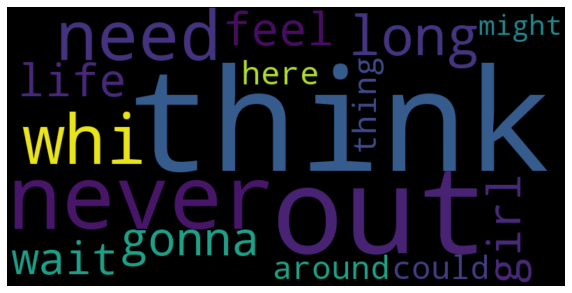

failure:


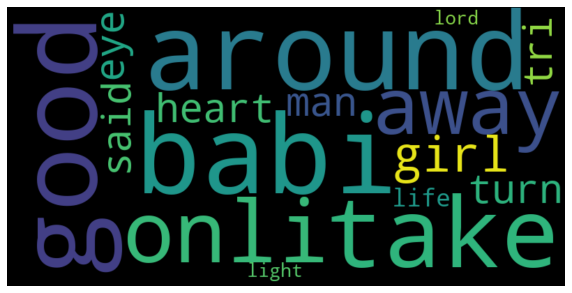

pop wordcloud:
success:


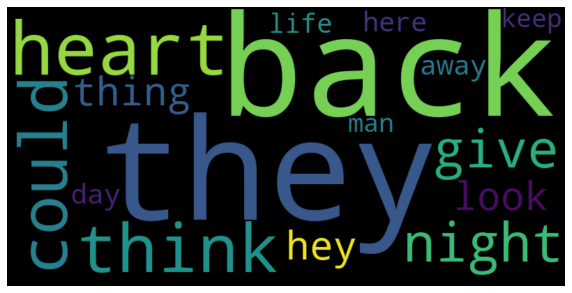

failure:


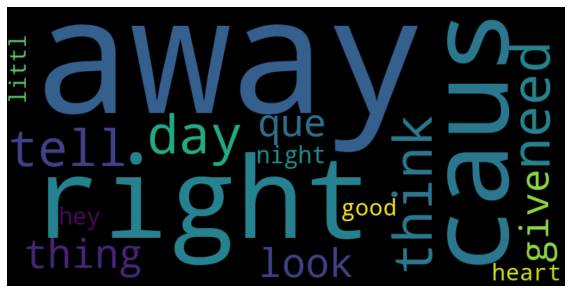

blues wordcloud:
success:


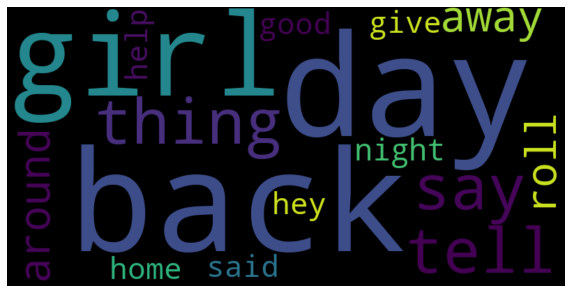

failure:


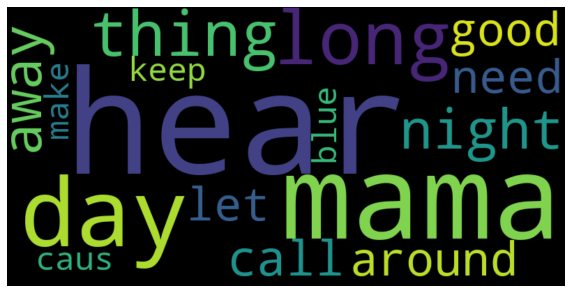

metal wordcloud:
success:


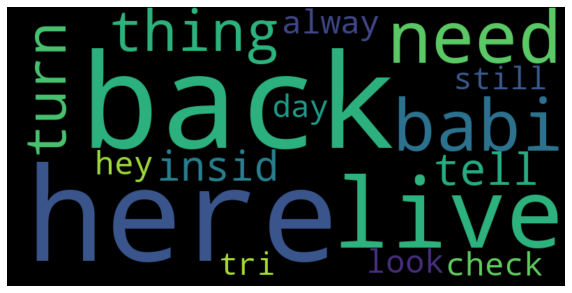

failure:


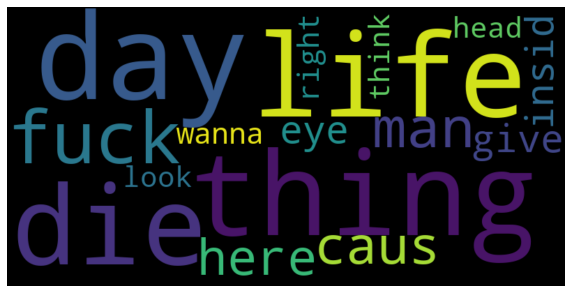

country wordcloud:
success:


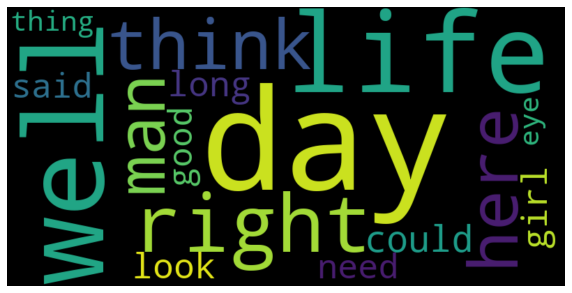

failure:


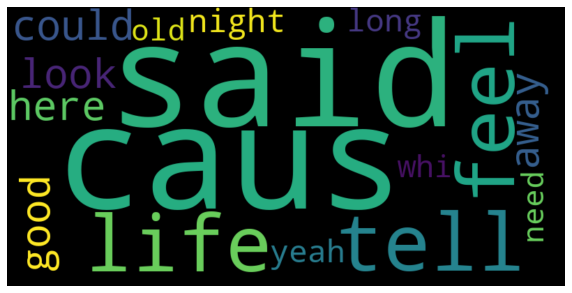

rock wordcloud:
success:


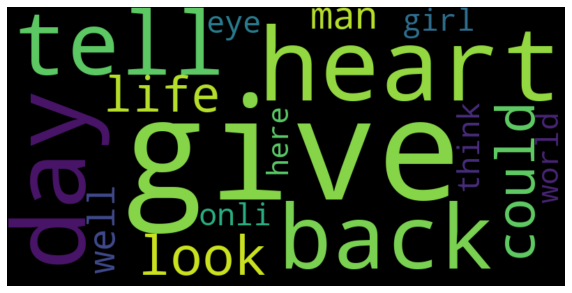

failure:


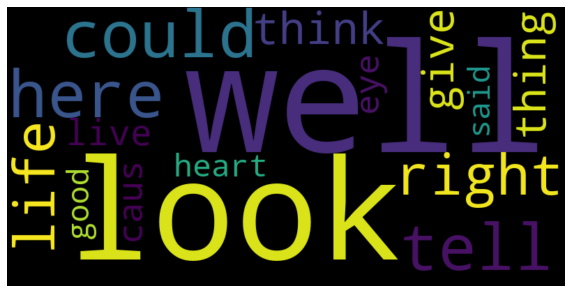

punk wordcloud:
success:


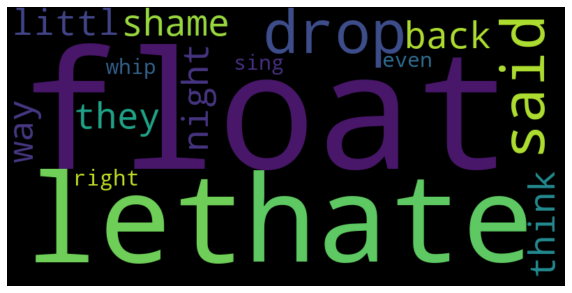

failure:


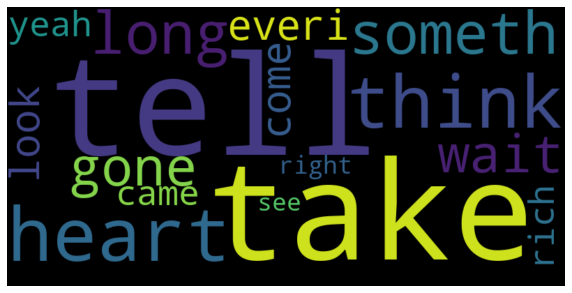

hip hop wordcloud:
success:


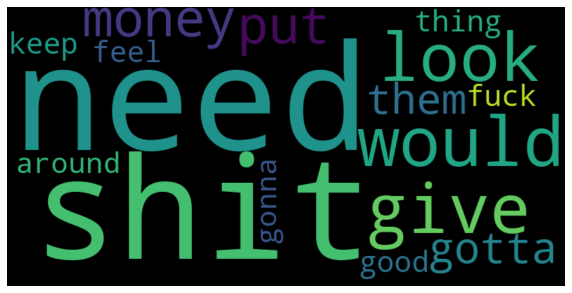

failure:


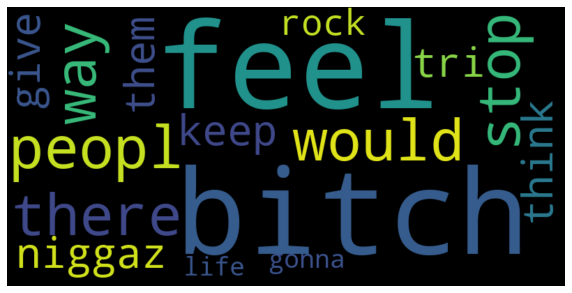

electronic wordcloud:
success:


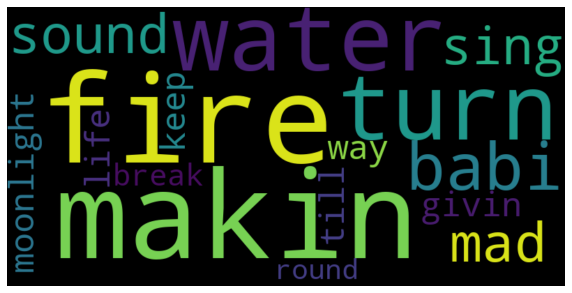

failure:


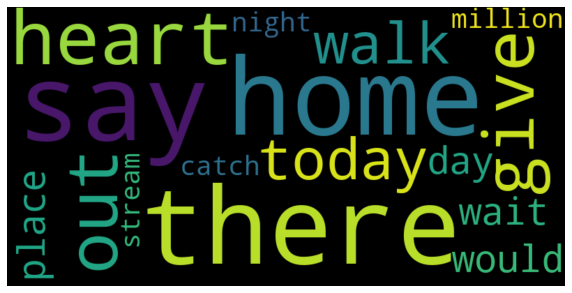

latin wordcloud:
success:


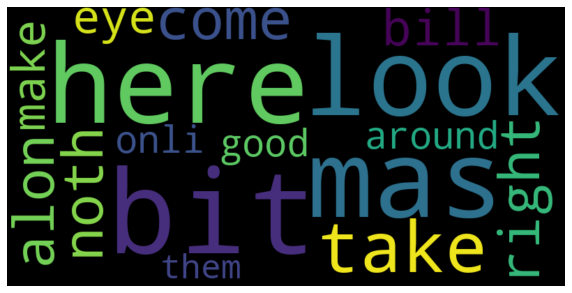

failure:


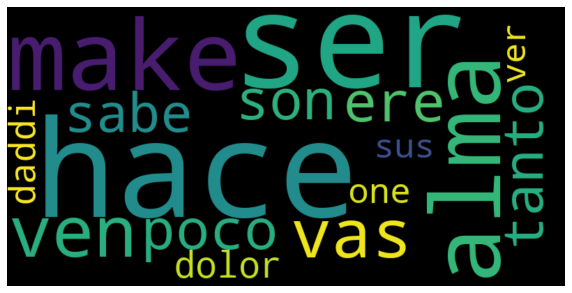

rap wordcloud:
success:


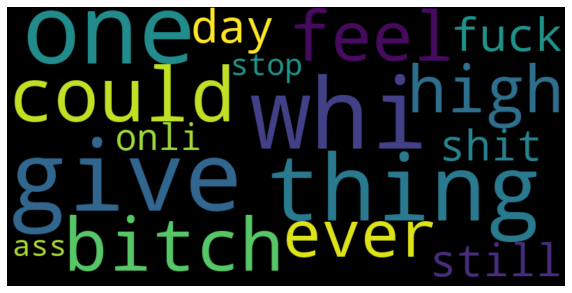

failure:


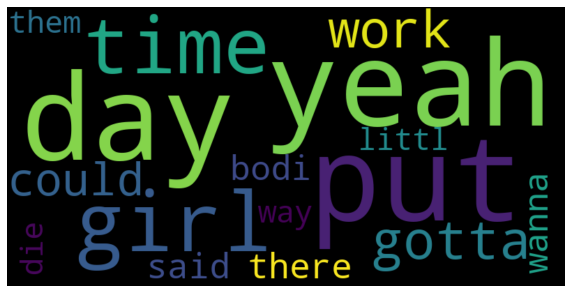

jazz wordcloud:
success:


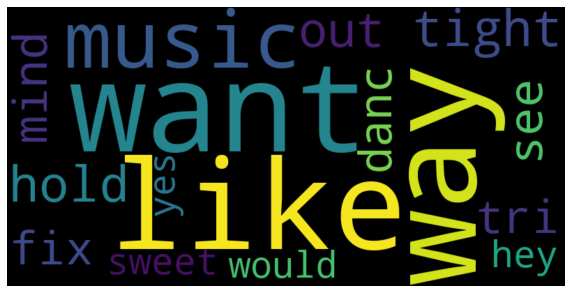

failure:


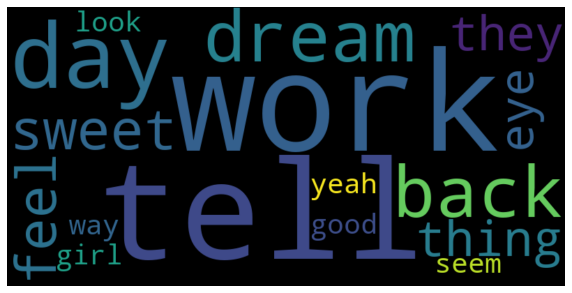

reggae wordcloud:
success:


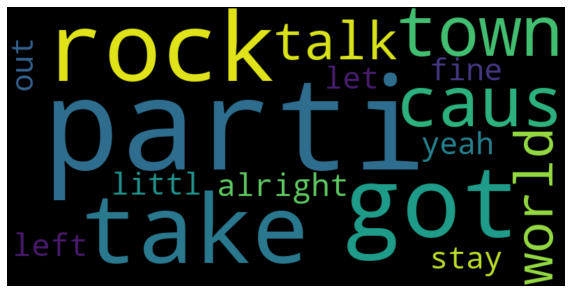

failure:


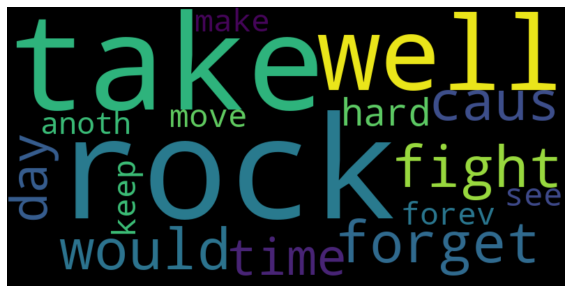

rhythm and blues wordcloud:
success:


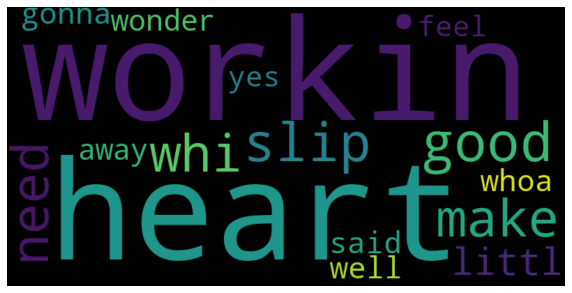

failure:


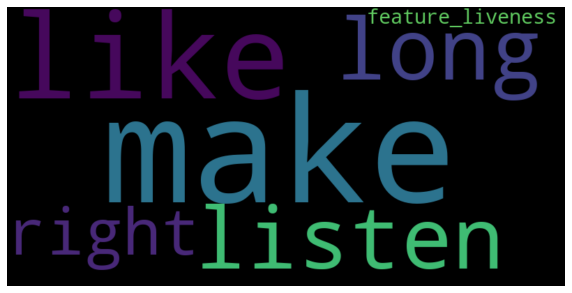

jam wordcloud:
success:


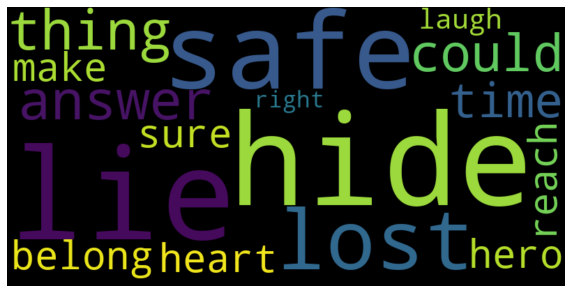

failure:


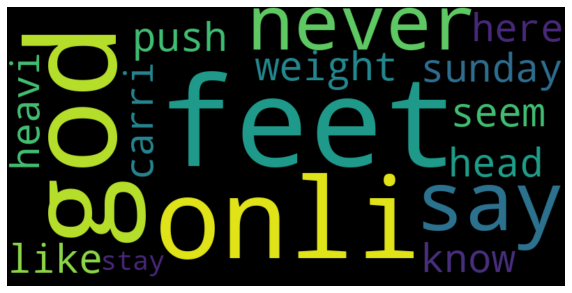

edm wordcloud:
success:


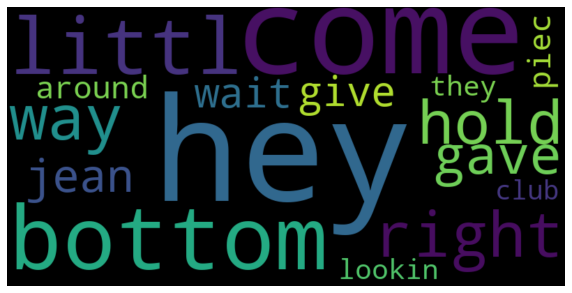

failure:


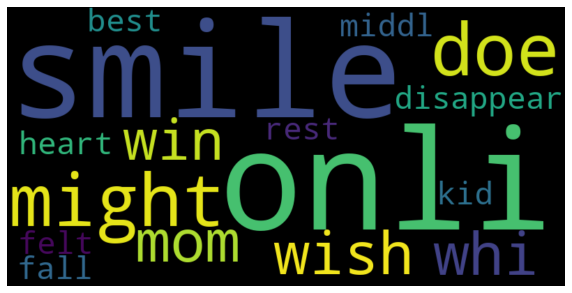

In [8]:
genres = ['folk', 'pop', 'blues', 'metal', 'country', 'rock', 'punk',
        'hip hop', 'electronic', 'latin', 'rap', 'jazz', 'reggae',
        'rhythm and blues', 'jam', 'edm']

for genre in genres:
    print(str(f'{genre} wordcloud:'))
    print(str(f'success:'))
    wordcloud_genre_success(genre)
    print(str(f'failure:'))
    wordcloud_genre_failure(genre)